### 필수과제4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
mpg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## 숫자형 데이터

### 1)막대 그래프

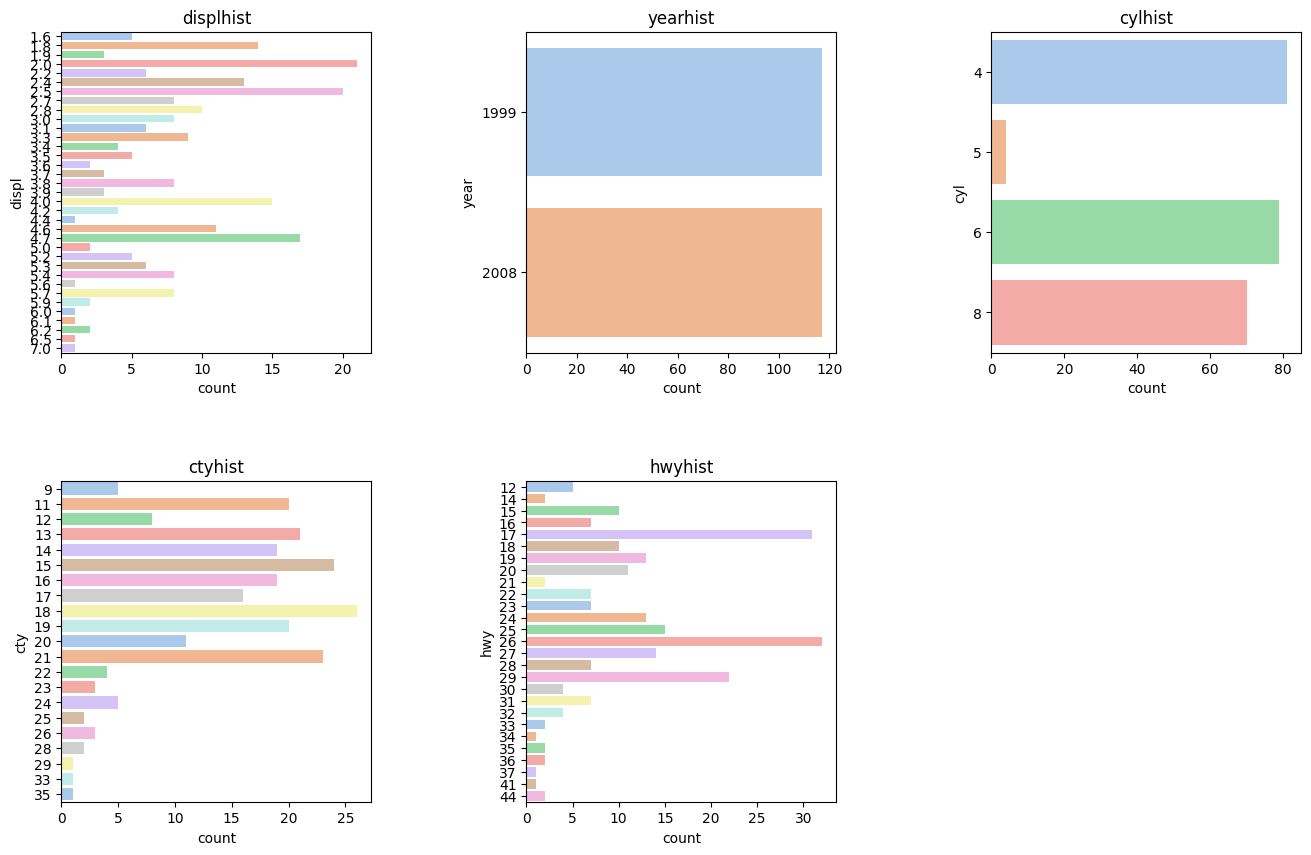

In [62]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(2,3)
plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace=0.5, hspace=0.4)

mpg_n = ['displ', 'year', 'cyl', 'cty', 'hwy']


for idx, feature in enumerate(mpg_n):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(y=feature, data=mpg, palette='pastel', ax=ax, orient='h')
    ax.set_title(f'{feature}hist')


- year, cyl은 값의 종류가 적어 분포에 의미를 찾기 힘들다.
- displ분포: 2.0, 4.6 주변으로 빈도가 높아, 정규분포로 보기 힘들다.
- cty분포: 15 부근으로 자료가 모여 있으나, right skewed된 경향을 보인다.
- hwy분포: 17, 26 주변으로 빈도가 높은 다봉분포로 보인다.

In [37]:
from scipy import stats

hwy_n = stats.shapiro(mpg['hwy']).pvalue > 0.05
cty_n = stats.shapiro(mpg['cty']).pvalue > 0.05
displ_n = stats.shapiro(mpg['displ']).pvalue > 0.05

print(f"hwy_is_normal: {hwy_n}")
print(f"cty_is_normal: {cty_n}")
print(f"displ_is_normal: {displ_n}")


hwy_is_normal: False
cty_is_normal: False
displ_is_normal: False


- 실제 분석 결과 hwy, cty, displ모두 정규성을 보이지 않는다. (유의수준 0.05)

### 2) scatter plot

<ipython-input-28-da3a4a1a022f>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='displ', data=mpg, palette='pastel', ax=ax)
<ipython-input-28-da3a4a1a022f>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='displ', data=mpg, palette='pastel', ax=ax)
<ipython-input-28-da3a4a1a022f>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='displ', data=mpg, palette='pastel', ax=ax)
<ipython-input-28-da3a4a1a022f>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='displ', data=mpg, palette='pastel', ax=ax)
<ipython-input-28-da3a4a1a022f>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='displ', data=mpg, palette='pastel', ax=ax)


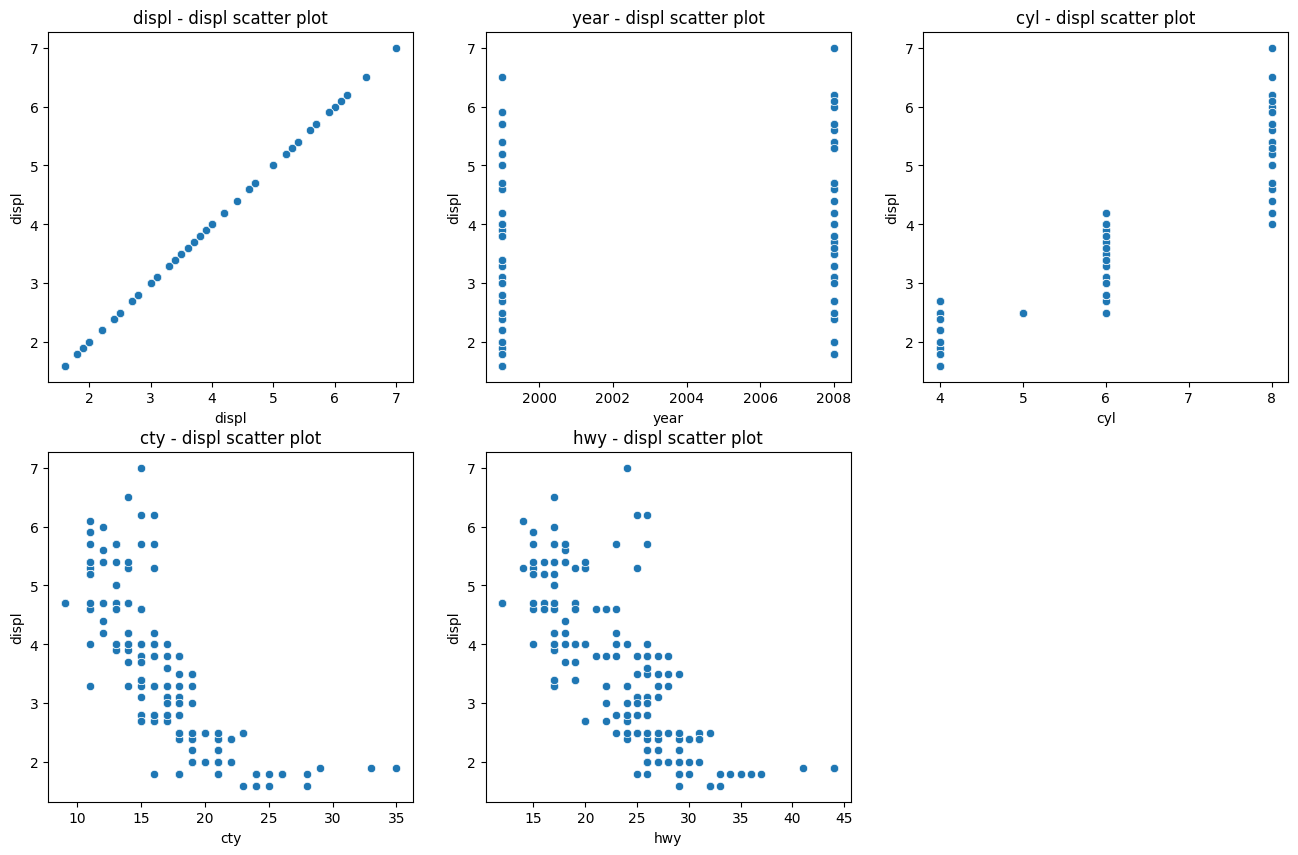

In [28]:
plt.figure(figsize=(16,10))
for idx, feature in enumerate(mpg_n):
    ax = plt.subplot(grid[idx])
    
    sns.scatterplot(x=feature, y='displ', data=mpg, palette='pastel', ax=ax)
    ax.set_title(f'{feature} - displ scatter plot')

- cty와 hwy는 displ과 음의 기울기로 linear한 관계가 있는 것으로 확인된다.

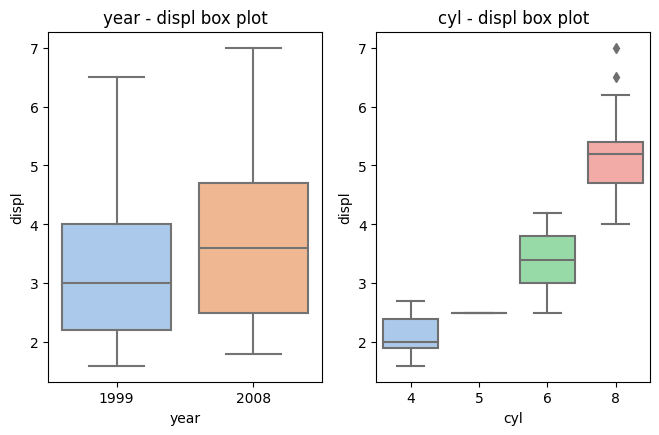

In [34]:
plt.figure(figsize=(12,10))
for idx, feature in enumerate(['year','cyl']):
    ax = plt.subplot(grid[idx])
    
    sns.boxplot(x=feature, y='displ', data=mpg, palette='pastel', ax=ax)
    ax.set_title(f'{feature} - displ box plot')

- year과 cyl은 값 종류가 적어 boxplot이 분석에 적절해 보여 그려보았다.
- year: median이 유의미한 차이가 있지 않은 것으로 보인다.
- cyl: median이 각 값 간 유의미한 차이가 있으며, 이는 cyl이 높아질 수록 커지는 양의 관계가 있는 것으로 보인다.

<ipython-input-63-3c223b260e34>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=feature, y='displ', data=mpg, palette='pastel', ax=ax)
<ipython-input-63-3c223b260e34>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=feature, y='displ', data=mpg, palette='pastel', ax=ax)
<ipython-input-63-3c223b260e34>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=feature, y='displ', data=mpg, palette='pastel', ax=ax)
<ipython-input-63-3c223b260e34>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=feature, y='displ', data=mpg, palette='pastel', ax=ax)
<ipython-input-63-3c223b260e34>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=feature, y='displ', data=mpg, palette='pastel', ax=ax)


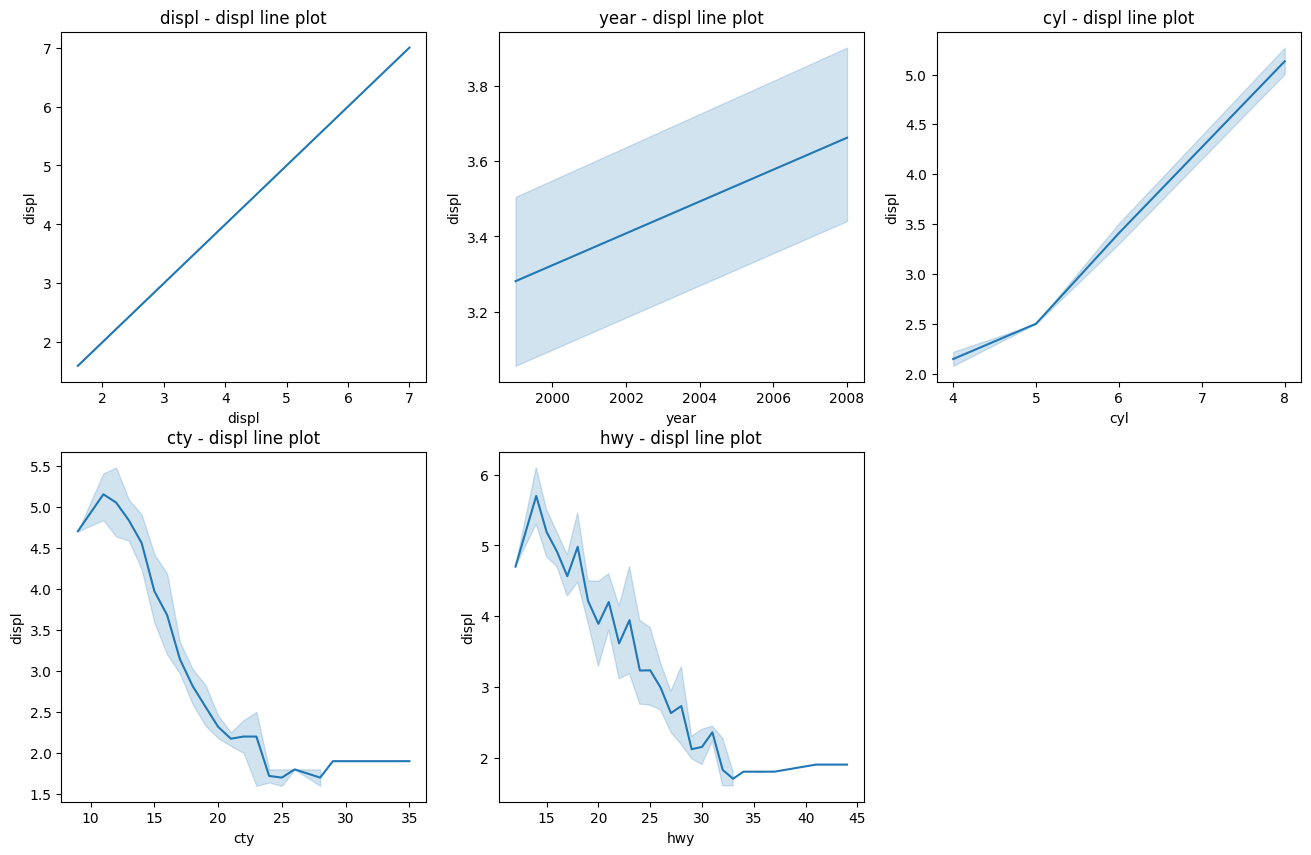

In [63]:
plt.figure(figsize=(16, 10))
for idx, feature in enumerate(mpg_n):
    ax = plt.subplot(grid[idx])
    
    sns.lineplot(x=feature, y='displ', data=mpg, palette='pastel', ax=ax)
    
    ax.set_title(f'{feature} - displ line plot')
    
plt.show()

- line으로 확인해 보아 cyl에서 뚜렷한 양의 기울기, cty, hwy에서 음의 기울기인linear관계를 확인할 수 있다.

## 문자 데이터

In [53]:
#문자 데이터에 이진형 데이터가 있는지 확인한다.
Uniq = []
for col in mpg.columns:
    Uniq.append((col, mpg[col].unique()))
df = pd.DataFrame(Uniq, columns=['Column', 'Unique_Values'])
df

,Column,Unique_Values
0,manufacturer,"[audi, chevrolet, dodge, ford, honda, hyundai,..."
1,model,"[a4, a4 quattro, a6 quattro, c1500 suburban 2w..."
2,displ,"[1.8, 2.0, 2.8, 3.1, 4.2, 5.3, 5.7, 6.0, 6.2, ..."
3,year,"[1999, 2008]"
4,cyl,"[4, 6, 8, 5]"
5,trans,"[auto(l5), manual(m5), manual(m6), auto(av), a..."
6,drv,"[f, 4, r]"
7,cty,"[18, 21, 20, 16, 19, 15, 17, 14, 11, 13, 12, 2..."
8,hwy,"[29, 31, 30, 26, 27, 25, 28, 24, 23, 20, 15, 1..."
9,fl,"[p, r, e, d, c]"


- 막대 그래프

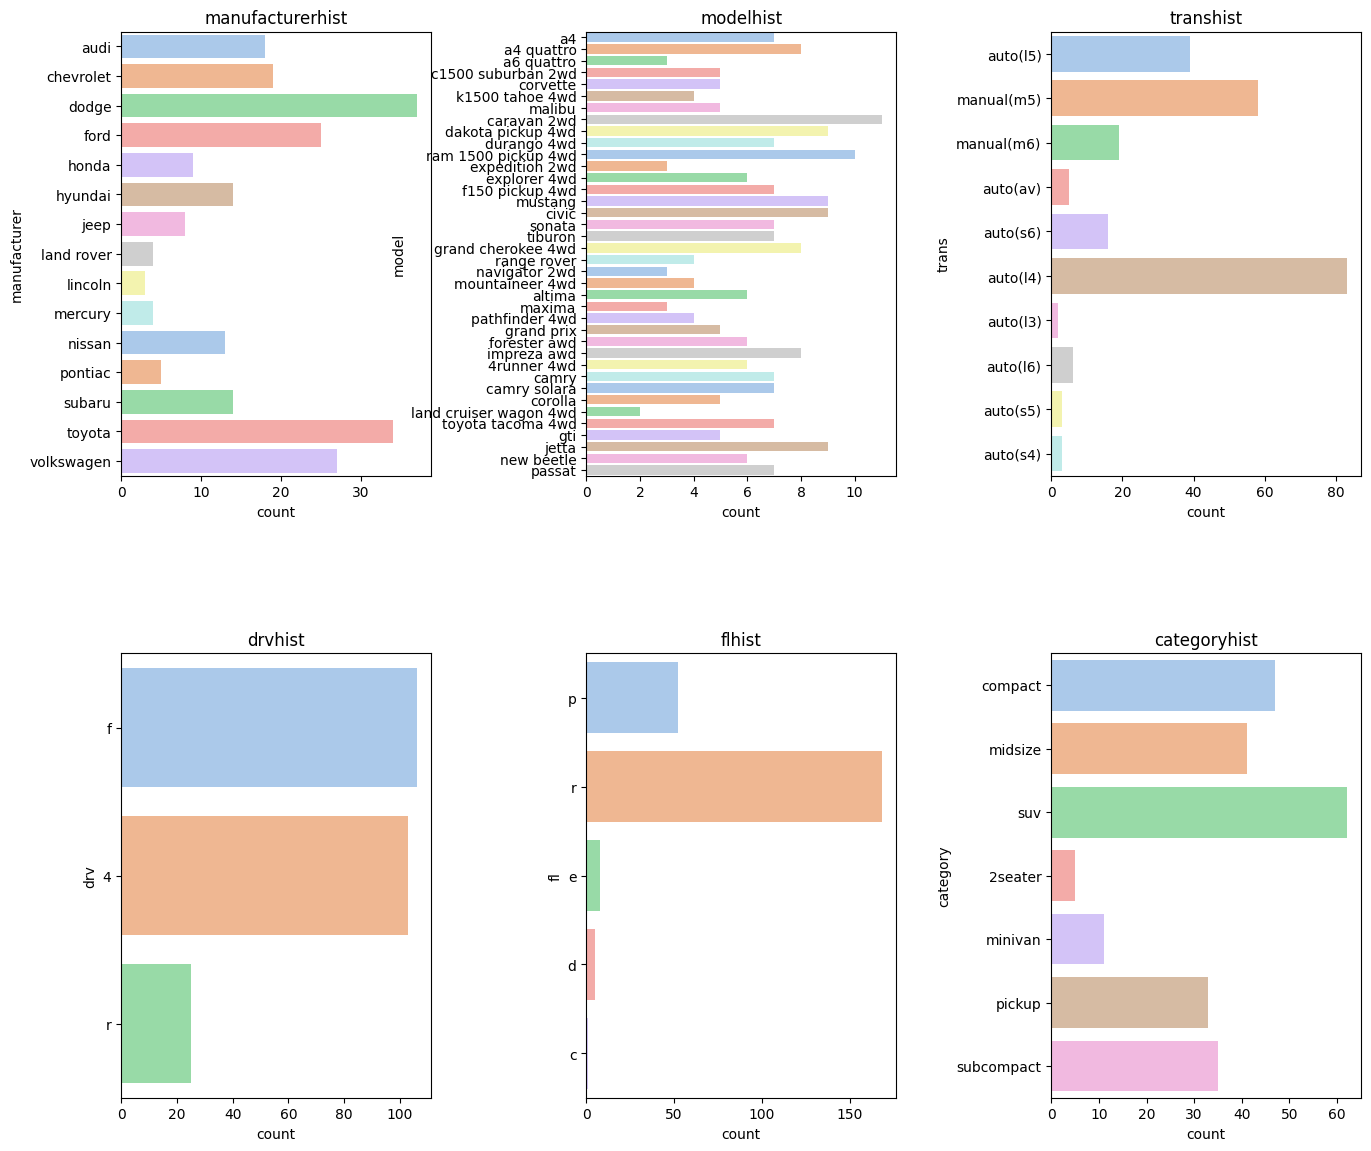

In [84]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(4,3)
plt.figure(figsize=(16,30))
plt.subplots_adjust(wspace=0.5, hspace=0.4)

mpg_nn = ['manufacturer', 'model', 'trans', 'drv', 'fl','category']


for idx, feature in enumerate(mpg_nn):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(y=feature, data=mpg, palette='pastel', ax=ax, orient='h')
    ax.set_title(f'{feature}hist')


- 수치형 데이터가 아니므로 분포의 형태를 설명하는것은 통계적 의미가 없다. 

- 위 범주들을 기준으로 위에서 분석한 displ 데이터들을 모두 분석해 보기로 한다

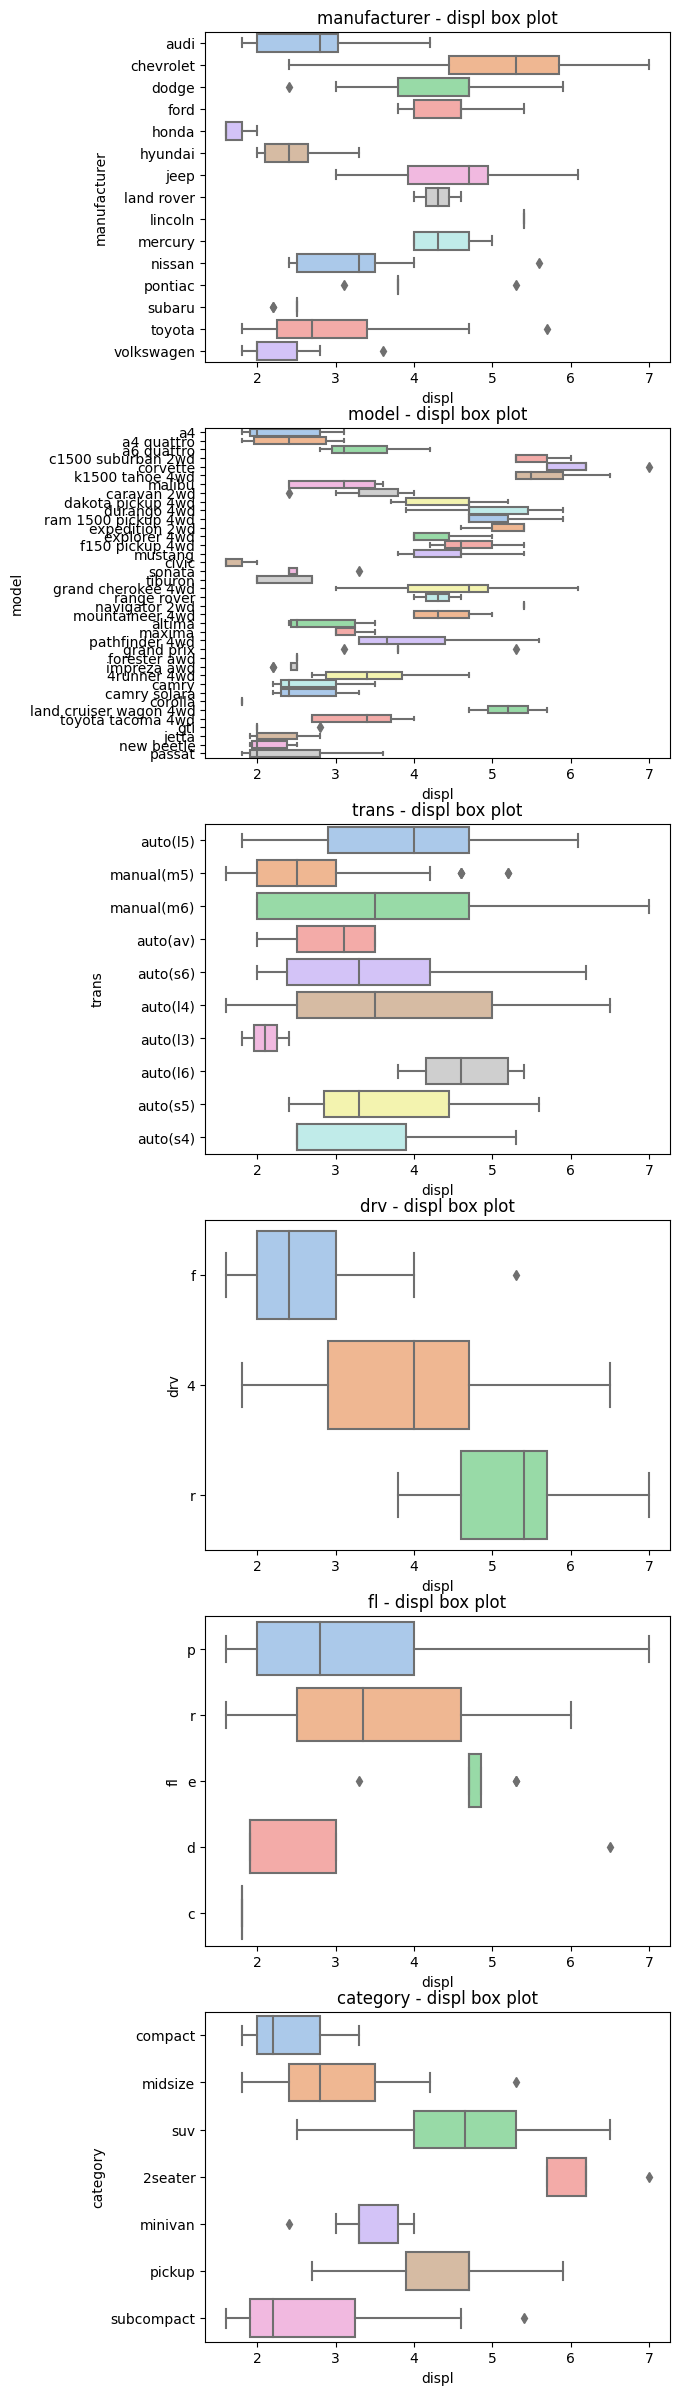

In [92]:
grid = gridspec.GridSpec(6,1)
plt.figure(figsize=(6,30))
for idx, feature in enumerate(mpg_nn):
    ax = plt.subplot(grid[idx])
    
    sns.boxplot(x='displ', y=feature, data=mpg, palette='pastel', ax=ax, orient='h')
    ax.set_title(f'{feature} - displ box plot')

- manufacturer기준: displ 의 차이는 크게 두 그룹으로 유의미한 차이가 있다.  

1그룹: dodge, ford, jeep, land rover, mercury, chevrolet

2그룹: audi, hyundai, nissan, toyota, volkswagen

3그룹: honda

-model 기준: 값이 많아 생략

-trans 기준: 대부분의 값 사이 유의미한 차이가 없고, autol3이 유의미하게 다른 것들 보다 낮은 수준을 보인다

-drv 기준: f, 4, r 간 순서대로 유의미하게 값이 높아지는 양의 관계에 있다.

-fl 기준: p, r, e 간 유의미한 차이가 없고, 이들 그룹보다 e가 유의미하게 높으며, c가 낮은 경향이 있다.

-category 기준: compact, midsize, minivan, subcompact 는 유의미한 차이가 없고, suv, pickup이 이들보다 유의미하게 높으며, 2seaster가 이들보다 더 유의미하게 높다.

